C:\Users\saura\AppData\Local\Temp\ipykernel_10520\1388356274.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.to_datetime(data['Year'], format='%Y')
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saura\AppData\Local\Temp\ipykernel_10520\1388356274.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

            CPI
Year           
1960-01-01  1.7
1963-01-01  1.3
1966-01-01  2.9
1969-01-01  5.5
1972-01-01  3.2
             CPI  Cluster
Year                     
1960-01-01   1.7        1
1963-01-01   1.3        1
1966-01-01   2.9        0
1969-01-01   5.5        0
1972-01-01   3.2        0
1975-01-01   9.1        2
1978-01-01   7.6        2
1981-01-01  10.3        2
1984-01-01   4.3        0
1987-01-01   3.6        0
1990-01-01   5.4        0
1993-01-01   3.0        0
1996-01-01   3.0        0
1999-01-01   2.2        1
2002-01-01   1.6        1
2005-01-01   3.4        0
2008-01-01   3.8        0
2011-01-01   3.2        0
2014-01-01   1.6        1
2015-01-01   0.1        1
2016-01-01   1.3        1
2017-01-01   2.1        1
2018-01-01   2.1        1
2019-01-01   1.6        1
             CPI  Cluster Cluster_Label
Year                                   
1960-01-01   1.7        1           Low
1963-01-01   1.3        1           Low
1966-01-01   2.9        0        Medium
1969-01-01  

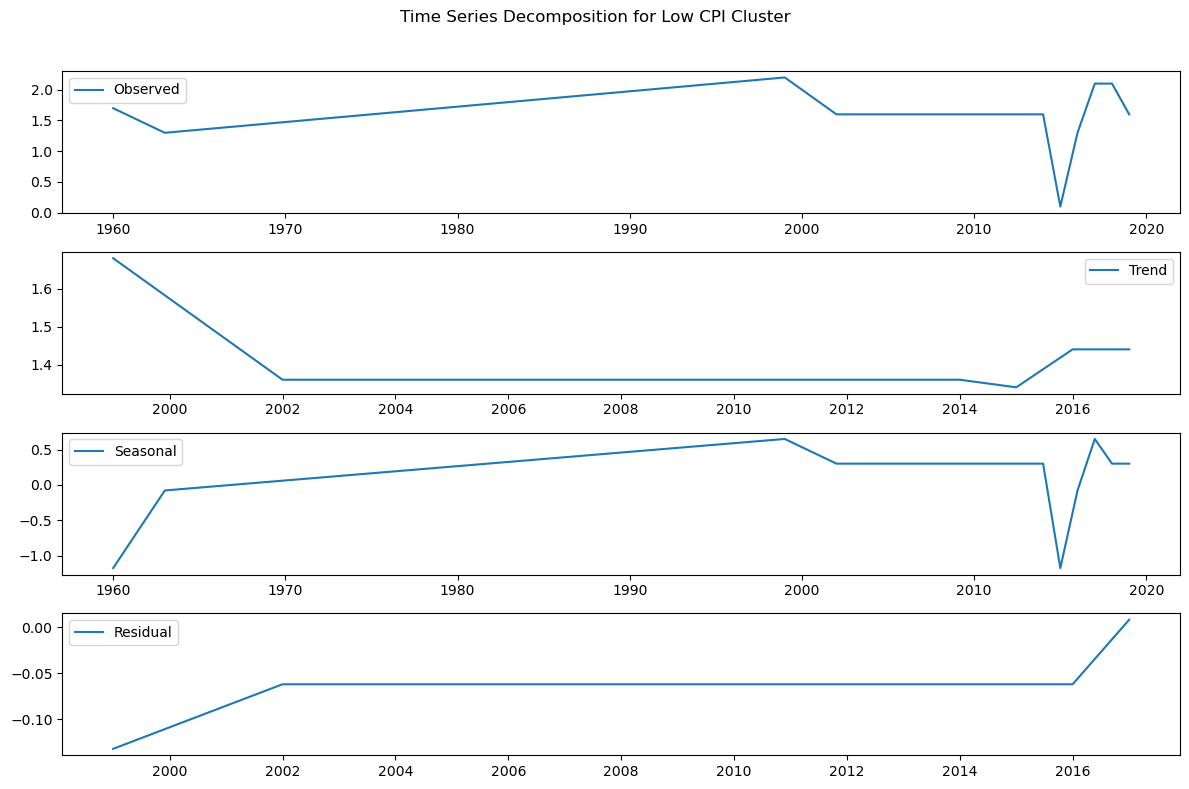

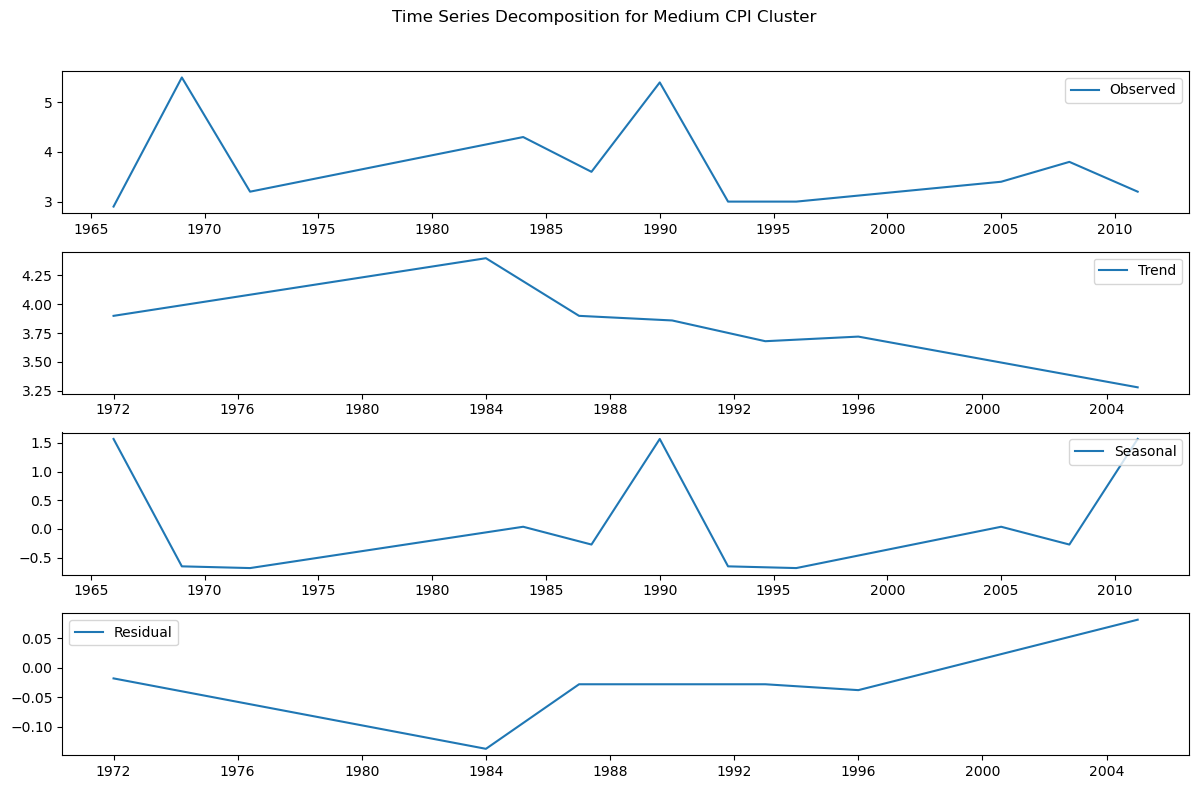

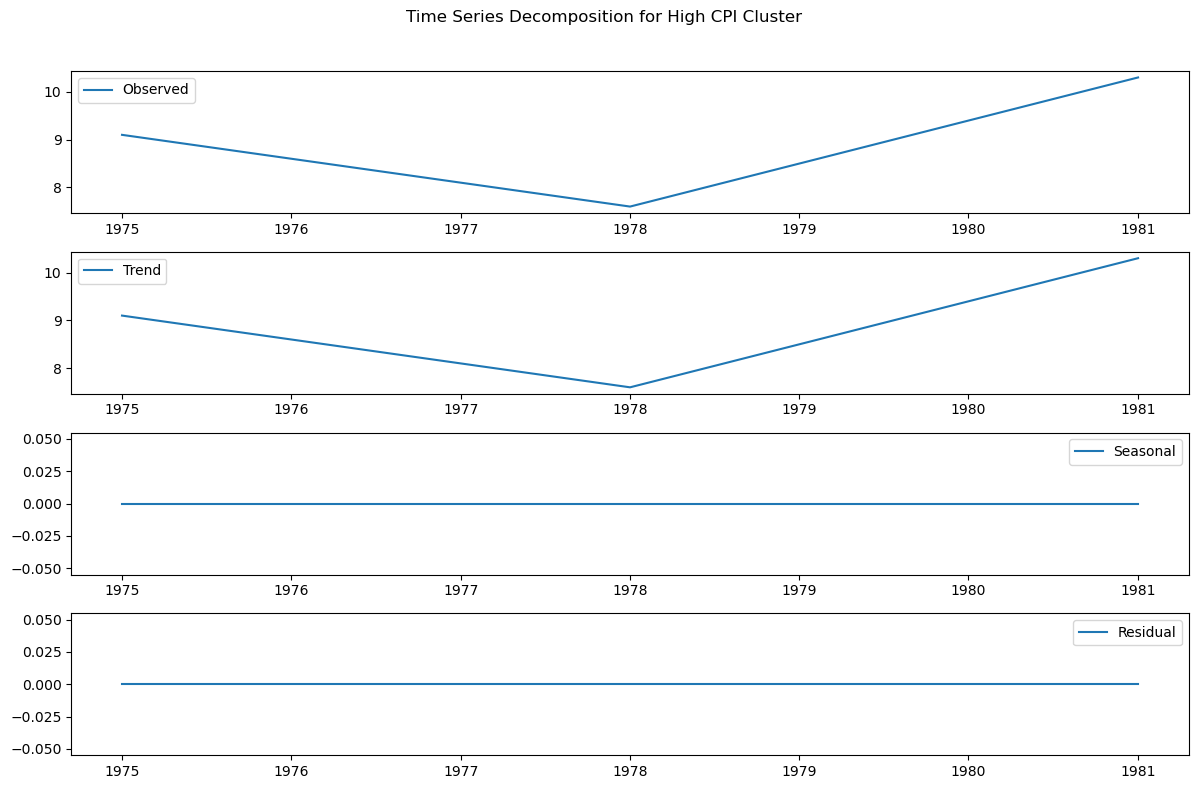

In [5]:
## Code to Cluster Historical CPI Data and Perform Trend Analysis using Statsmodels

"""
This script clusters historical CPI data using the K-Means clustering algorithm and performs trend analysis 
for different clusters. The trend analysis includes decomposing the CPI time series data into trend, seasonal,
and residual components using the statsmodels library.
"""


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm


# Load CPI data from an Excel file
cpi_data = pd.read_excel('Historical_Inflation.xlsx')

# Prepare data for clustering
data = cpi_data[['Year', 'CPI']]
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

print(data.head())

# Apply K-Means clustering
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data[['CPI']])
data['Cluster'] = kmeans.labels_

# Check the clusters
print(data)

data.describe()

# Calculate cluster statistics
cluster_stats = data.groupby('Cluster')['CPI'].agg(['mean', 'median', 'std', 'min', 'max'])

# Rename clusters based on mean CPI
cluster_order = cluster_stats['mean'].sort_values().index 
cluster_labels = {cluster_order[0]: 'Low', cluster_order[1]: 'Medium', cluster_order[2]: 'High'} 
data['Cluster_Label'] = data['Cluster'].map(cluster_labels) 
print(data)

# Calculate summary statistics by cluster labels
label_stats = data.groupby('Cluster_Label')['CPI'].agg(['mean', 'median', 'std', 'min', 'max']) 
print(label_stats)

# Decompose time series for each cluster
for label in data['Cluster_Label'].unique():
    subset = data[data['Cluster_Label'] == label]
    
    # Check the length of the subset and adjust the period accordingly
    if len(subset) >= 24:
        period = 12
    else:
        period = len(subset) // 2  # Use half the length of the subset as the period
    
    decomposition = sm.tsa.seasonal_decompose(subset['CPI'], model='additive', period=period)
    
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Time Series Decomposition for {label} CPI Cluster')
    
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='best')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='best')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='best')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
